## specifying the folder where images are present

In [1]:
TrainingImagePath = "C:/Users/Admin/Desktop/40 projects/face recognition/train"

In [2]:
validationImagePath = "C:/Users/Admin/Desktop/40 projects/face recognition/validation"

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
#base model

train_datagen = ImageDataGenerator(rescale = 1./225)

test_datagen = ImageDataGenerator(rescale = 1./225)

In [5]:
#Generating the training data

training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 200 images belonging to 25 classes.


# Validation set

In [6]:
#Generating the validation data

validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 50 images belonging to 25 classes.


In [7]:
# Libraries and model type

# Create CNN Deep learning model

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [8]:
# Initializing the Convolutional Neural Network

classifier = Sequential()

# MODEL

In [10]:
# STEP 1 Convolution
# Adding th e first layer of CNN
# We are using the format (64,64,3) because we are using Tensorflow backend
# It means 3 matrix of size (64x64) pixels representing Red, Green and Blue components of pixels

classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [14]:
#STEP 2- Max Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))

# Additional layer of convolution for better accuracy
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

In [15]:
#STEP 3- Flattening

classifier.add(Flatten())

In [16]:
#STEP 4 - Fully connected neural network

classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(25, activation='softmax'))

In [17]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

# Compiler

In [18]:
# Compiling the CNN

classifier.compile(loss='categorical_crossentropy',
                  optimizer = 'adam', metrics =['accuracy'])

# Execution of model

In [19]:
# Starting the model training
import warnings
warnings.filterwarnings('ignore')

In [20]:
history = classifier.fit_generator(training_set, epochs =20,
                                  validation_data=validation_set)

Epoch 1/20
10/10 [==============================] - 31s 3s/step - loss: 3.2765 - accuracy: 0.0450 - val_loss: 3.1597 - val_accuracy: 0.2000
Epoch 2/20
10/10 [==============================] - 17s 2s/step - loss: 3.0013 - accuracy: 0.2100 - val_loss: 2.7852 - val_accuracy: 0.2200
Epoch 3/20
10/10 [==============================] - 17s 2s/step - loss: 2.3153 - accuracy: 0.3900 - val_loss: 2.0974 - val_accuracy: 0.4800
Epoch 4/20
10/10 [==============================] - 17s 2s/step - loss: 1.3630 - accuracy: 0.7200 - val_loss: 1.6442 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 18s 2s/step - loss: 0.6175 - accuracy: 0.8700 - val_loss: 1.1434 - val_accuracy: 0.7000
Epoch 6/20
10/10 [==============================] - 17s 2s/step - loss: 0.2700 - accuracy: 0.9500 - val_loss: 1.3341 - val_accuracy: 0.6600
Epoch 7/20
10/10 [==============================] - 17s 2s/step - loss: 0.1390 - accuracy: 0.9800 - val_loss: 1.2178 - val_accuracy: 0.7200
Epoch 8/20
10/10 [==

## Accuracy base model

<Figure size 432x288 with 0 Axes>

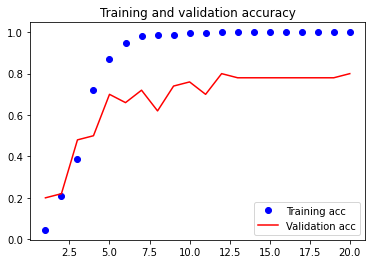

<Figure size 432x288 with 0 Axes>

In [28]:
#Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Loss base model

<Figure size 432x288 with 0 Axes>

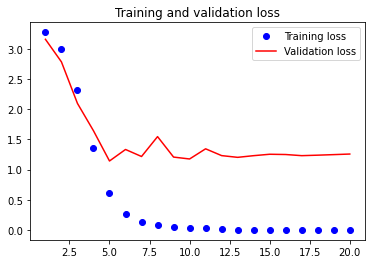

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [30]:
# Lets improve

In [31]:
# Model 2

In [33]:
# Adding parameters in the ImageDatagenerator

train_datagen = ImageDataGenerator(rescale=1./225, shear_range=0.5,
                                  zoom_range=0.5, width_shift_range=0.2,
                                  height_shift_range=0.2)

In [35]:
# No transformations are done on the testing images

test_datgen = ImageDataGenerator(rescale=1./225)

In [37]:
# Generating the training data

training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 200 images belonging to 25 classes.


In [38]:
# Generating the validation data

In [39]:
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 50 images belonging to 25 classes.


In [40]:
#Create Cnn deep learning model

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [41]:
# Initializing the Convolutional Neural Network

classifier = Sequential()

In [42]:
# Convolution

classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [43]:
#Max Pooling

classifier.add(MaxPool2D(pool_size=(2,2)))

In [44]:
# Additional layer of convolution for better accuracy

In [45]:
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

In [46]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [47]:
#Flattening

In [48]:
classifier.add(Flatten())

In [49]:
#Fully connected neural network

In [50]:
classifier.add(Dense(64, activation='relu'))#hidden layer

In [51]:
classifier.add(Dense(25, activation='softmax'))#output layer

In [52]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [53]:
#Compiler

In [54]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])

In [55]:
#Execute

In [57]:
#Starting the model training
history = classifier.fit_generator(training_set, epochs =100,
                                  validation_data=validation_set)

Epoch 1/100
10/10 [==============================] - 21s 2s/step - loss: 3.3443 - accuracy: 0.0250 - val_loss: 3.2068 - val_accuracy: 0.0800
Epoch 2/100
10/10 [==============================] - 17s 2s/step - loss: 3.2096 - accuracy: 0.0550 - val_loss: 3.1621 - val_accuracy: 0.0400
Epoch 3/100
10/10 [==============================] - 17s 2s/step - loss: 3.1646 - accuracy: 0.0350 - val_loss: 3.0992 - val_accuracy: 0.0800
Epoch 4/100
10/10 [==============================] - 17s 2s/step - loss: 3.0761 - accuracy: 0.1100 - val_loss: 3.0562 - val_accuracy: 0.1000
Epoch 5/100
10/10 [==============================] - 17s 2s/step - loss: 3.0152 - accuracy: 0.1050 - val_loss: 2.9093 - val_accuracy: 0.0800
Epoch 6/100
10/10 [==============================] - 17s 2s/step - loss: 2.9265 - accuracy: 0.1200 - val_loss: 2.8374 - val_accuracy: 0.2000
Epoch 7/100
10/10 [==============================] - 18s 2s/step - loss: 2.8360 - accuracy: 0.1600 - val_loss: 2.7473 - val_accuracy: 0.1400
Epoch 8/100
1

In [58]:
#Displaying curves of loss and accuracy during training

In [59]:
import matplotlib.pyplot as plt

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

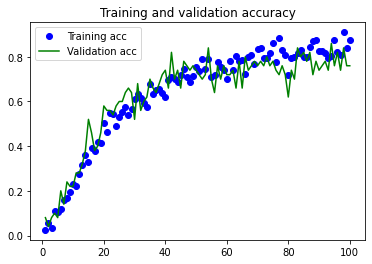

<Figure size 432x288 with 0 Axes>

In [65]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

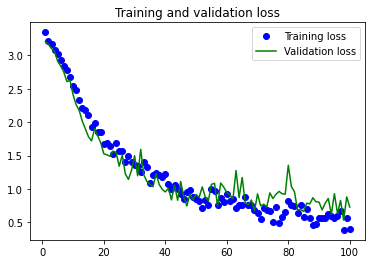

<Figure size 432x288 with 0 Axes>

In [66]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()